In [1]:
import pandas as pd

In [2]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

# RAW PATENTS

In [4]:
df_raw = pd.read_parquet('../data/processed/raw_patents_2018-2020.parquet')
df_raw.head(2)

,patent_id,name_first,name_last,city,country,grant_date,grant_year,app_date,app_year,class_distinct_count,class_concat,class_IPC_distinct_count,class_IPC_concat,CountryName,CityCountry,Ecosystem,GoogleCity
0,20180274840,Bin,FEI,Qingdao,CN,2018-09-27T00:00:00.000Z,2018,2016-06-08T00:00:00.000Z,2016,1.0,F25D,1.0,F25D,China,QingdaoChina,None,Qingdao
1,20180274840,Jinlin,LIU,Qingdao,CN,2018-09-27T00:00:00.000Z,2018,2016-06-08T00:00:00.000Z,2016,1.0,F25D,1.0,F25D,China,QingdaoChina,None,Qingdao


# ABSTRACTS

In [6]:
df_abstract = pd.read_parquet("../data/processed/abstract_2018-2020.parquet")

In [7]:
# Changing the name of the column 'publication_number' to 'patent_id' in df_abstract
df_abstract.rename(columns={'publication_number': 'patent_id'}, inplace=True)
df_abstract.head(2)

,patent_id,abstract,year
0,20180137767,A UAV having a radar-guided landing function t...,2018
1,20180158892,"In this element, one of the current flow elect...",2018


# MERGED DATAFRAMES

In [8]:
# Merging dataframes
df_merge = pd.merge(df_raw, df_abstract, on='patent_id', how='left')
df_merge.head(2)

,patent_id,name_first,name_last,city,country,grant_date,grant_year,app_date,app_year,class_distinct_count,class_concat,class_IPC_distinct_count,class_IPC_concat,CountryName,CityCountry,Ecosystem,GoogleCity,abstract,year
0,20180274840,Bin,FEI,Qingdao,CN,2018-09-27T00:00:00.000Z,2018,2016-06-08T00:00:00.000Z,2016,1.0,F25D,1.0,F25D,China,QingdaoChina,None,Qingdao,A refrigerator comprises: a refrigerator compa...,2018.0
1,20180274840,Jinlin,LIU,Qingdao,CN,2018-09-27T00:00:00.000Z,2018,2016-06-08T00:00:00.000Z,2016,1.0,F25D,1.0,F25D,China,QingdaoChina,None,Qingdao,A refrigerator comprises: a refrigerator compa...,2018.0


In [10]:
# Selecting only the columns that we need: 'patent_id', 'abstract', 'grant_year', 'class_distinct_count', 'class_concat', 'city', 'GoogleCity', 'country', 'CountryName', 'CityCountry', 'Ecosystem'
df = df_merge[['patent_id', 'abstract', 'grant_year', 'class_distinct_count', 'class_concat', 'city', 'GoogleCity', 'country', 'CountryName', 'Ecosystem']]
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None
1,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None


In [11]:
from unidecode import unidecode

# Convert to plain ASCII
df['city'] = df['city'].apply(lambda x: unidecode(str(x)))

# Limit to varchar(200)
df['city'] = df['city'].apply(lambda x: x[:200])

In [49]:
# Concatenating 'city' and 'country' to create a new column 'CityCountry'
df['city_country_code'] = df['city'] + '_' + df['country']

In [50]:
print('Shape: ',df.shape)
print(df.head(2))

Shape:  (1174031, 23)
     patent_id                                           abstract  grant_year  \
0  20180274840  A refrigerator comprises: a refrigerator compa...        2018   
4  20180274869                                                NaN        2018   

   class_distinct_count class_concat      city GoogleCity country CountryName  \
0                   1.0         F25D   Qingdao    Qingdao      CN       China   
4                   NaN         None  Shenzhen   Shenzhen      CN       China   

  Ecosystem class_1 class_2 class_3 class_section_1 class_section_2  \
0      None    F25D     NaN     NaN               F             NaN   
4  Shenzhen    None    None    None            None            None   

  class_section_3                                class_section_name1  \
0             NaN  Mechanical Engineering; Lighting; Heating; Wea...   
4            None                                                NaN   

  class_section_name2 class_section_name3  \
0             

## IPC IN THE MAIN DF

In [14]:
# Checking the max value in "class_distinct_count"
df['class_distinct_count'].max()

24.0

In [15]:
# Visualizing the rows with the max value in "class_distinct_count"
df[df['class_distinct_count'] == 24]

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code
96328,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Gentry,Gentry,US,United States,None,Gentry_US
96329,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Round Rock,Round Rock,US,United States,Austin,Round Rock_US
96330,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Eureka Springs,Eureka Springs,US,United States,None,Eureka Springs_US
96331,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Bentonville,Bentonville,US,United States,None,Bentonville_US
96332,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Bella Vista,Bella Vista,US,United States,None,Bella Vista_US
96333,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Chadderton-Oldham,None,GB,United Kingdom,None,Chadderton-Oldham_GB
96334,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Noel,None,US,United States,None,Noel_US
96335,20190292030,Some embodiments include apparatuses to fulfil...,2019,24.0,"G06F,B60L,G06K,A47F,A47L,G01C,G06Q,G01S,B60P,B...",Bentonville,Bentonville,US,United States,None,Bentonville_US
586586,20190256334,"Systems, apparatuses, and methods for determin...",2019,24.0,"G06F,G01S,G08G,H04W,B65F,A47F,B07C,H04L,G06K,B...",Eureka Springs,Eureka Springs,US,United States,None,Eureka Springs_US
586587,20190256334,"Systems, apparatuses, and methods for determin...",2019,24.0,"G06F,G01S,G08G,H04W,B65F,A47F,B07C,H04L,G06K,B...",Noel,None,US,United States,None,Noel_US


<Axes: xlabel='class_distinct_count'>

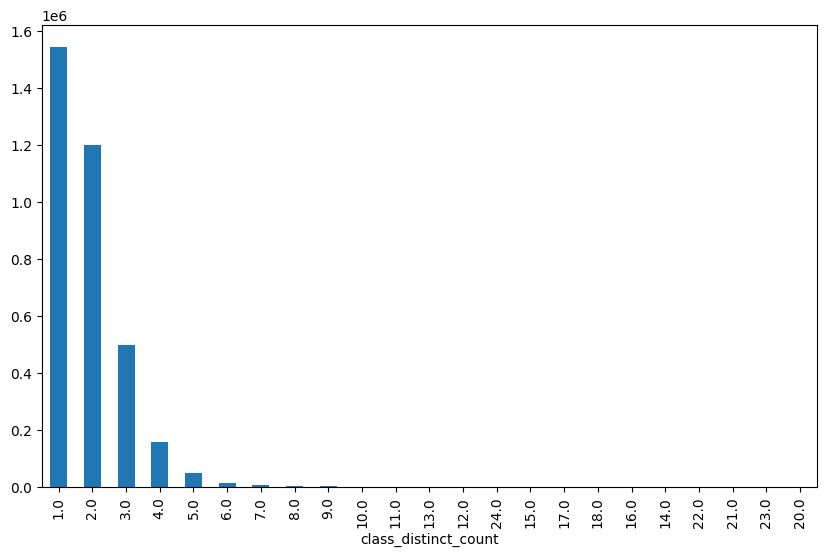

In [16]:
# Generating a bar chart with the number of unique patents per 'class_distinct_count'
df['class_distinct_count'].value_counts().plot(kind='bar', figsize=(10, 6))

In [17]:
# What percentage of unique patents have up to 5 classes?
df[df['class_distinct_count'] <= 5].shape[0] / df.shape[0] * 100

98.59983979362626

In [18]:
df[df['class_distinct_count'] <= 3].shape[0] / df.shape[0] * 100


92.74958839439616

In [19]:
# Creating new columns 'class_1', 'class_2', 'class_3' and assigning the first 3 values from 'class_concat', respectively
df['class_1'] = df['class_concat'].str.split(',').str[0]
df['class_2'] = df['class_concat'].str.split(',').str[1]
df['class_3'] = df['class_concat'].str.split(',').str[2]
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN
1,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN


In [20]:
# Creating new columns 'class_section_1', 'class_section_2', 'class_section_3' and leaving it empty for now
df['class_section_1'] = ''
df['class_section_2'] = ''
df['class_section_3'] = ''
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,,,
1,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,,,


In [21]:
# Eliminating duplicates based on 'patent_id'
df.drop_duplicates(subset=['patent_id'], inplace=True)
df.shape

(1174031, 17)

# NEW DF: 'df_ipc'

In [22]:
df_ipc = pd.read_excel('../data/raw/IPC Titles.xlsx')
df_ipc.head(2)

,IPC,title
0,G16Y,INFORMATION AND COMMUNICATION TECHNOLOGY SPECI...
1,F24J,NaN


In [23]:
# Create new column 'section', with the first character of the 'IPC'
df_ipc['section'] = df_ipc['IPC'].str[0]
df_ipc.head(2)

,IPC,title,section
0,G16Y,INFORMATION AND COMMUNICATION TECHNOLOGY SPECI...,G
1,F24J,NaN,F


In [24]:
# Dictionary mapping sections to section names
sections_dict = {
    'A': 'Human Necessities',
    'B': 'Performing Operations; Transporting',
    'C': 'Chemistry; Metallurgy',
    'D': 'Textiles; Paper',
    'E': 'Fixed Constructions',
    'F': 'Mechanical Engineering; Lighting; Heating; Weapons; Blasting',
    'G': 'Physics',
    'H': 'Electricity'
}

# Create the 'section_name' column by mapping values from the 'section' column
df_ipc['section_name'] = df_ipc['section'].map(sections_dict)

In [25]:
df_ipc.head(2)

,IPC,title,section,section_name
0,G16Y,INFORMATION AND COMMUNICATION TECHNOLOGY SPECI...,G,Physics
1,F24J,NaN,F,Mechanical Engineering; Lighting; Heating; Wea...


## ASSIGNING IPC SECTIONS TO THE MAIN DF

In [27]:
# Assign the first character of the columns 'class_1', 'class_2', 'class_3' to the columns 'class_section_1', 'class_section_2', 'class_section_3', respectively
df['class_section_1'] = df['class_1'].str[0]
df['class_section_2'] = df['class_2'].str[0]
df['class_section_3'] = df['class_3'].str[0]
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,F,NaN,NaN
4,20180274869,NaN,2018,NaN,None,Shenzhen,Shenzhen,CN,China,Shenzhen,Shenzhen_CN,None,None,None,None,None,None


In [28]:
# Create columns 'class_section_name1', 'class_section_name2', 'class_section_name3', then map the values from the columns 'class_section_1', 'class_section_2', 'class_section_3' to the new columns using the dictionary 'sections_dict'
df['class_section_name1'] = df['class_section_1'].map(sections_dict)
df['class_section_name2'] = df['class_section_2'].map(sections_dict)
df['class_section_name3'] = df['class_section_3'].map(sections_dict)
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3,class_section_name1,class_section_name2,class_section_name3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,F,NaN,NaN,Mechanical Engineering; Lighting; Heating; Wea...,NaN,NaN
4,20180274869,NaN,2018,NaN,None,Shenzhen,Shenzhen,CN,China,Shenzhen,Shenzhen_CN,None,None,None,None,None,None,NaN,NaN,NaN


In [29]:
# Creating new columns 'class_description_1', 'class_description_2', 'class_description_3' and leaving it empty for now
df['class_description_1'] = ''
df['class_description_2'] = ''
df['class_description_3'] = ''
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3,class_section_name1,class_section_name2,class_section_name3,class_description_1,class_description_2,class_description_3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,F,NaN,NaN,Mechanical Engineering; Lighting; Heating; Wea...,NaN,NaN,,,
4,20180274869,NaN,2018,NaN,None,Shenzhen,Shenzhen,CN,China,Shenzhen,Shenzhen_CN,None,None,None,None,None,None,NaN,NaN,NaN,,,


In [30]:
# Create a dictionary to map 'classes' to 'title'
class_description_dict = dict(zip(df_ipc['IPC'], df_ipc['title']))

# Update the values in the existing 'class_description_1' column using map
df['class_description_1'] = df['class_1'].map(class_description_dict)

In [31]:
# Update the values in the existing 'class_description_2' column using map
df['class_description_2'] = df['class_2'].map(class_description_dict)

In [32]:
# Update the values in the existing 'class_description_3' column using map
df['class_description_3'] = df['class_3'].map(class_description_dict)

In [33]:
df.head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3,class_section_name1,class_section_name2,class_section_name3,class_description_1,class_description_2,class_description_3
0,20180274840,A refrigerator comprises: a refrigerator compa...,2018,1.0,F25D,Qingdao,Qingdao,CN,China,None,Qingdao_CN,F25D,NaN,NaN,F,NaN,NaN,Mechanical Engineering; Lighting; Heating; Wea...,NaN,NaN,REFRIGERATORS; COLD ROOMS; ICE-BOXES; COOLING ...,NaN,NaN
4,20180274869,NaN,2018,NaN,None,Shenzhen,Shenzhen,CN,China,Shenzhen,Shenzhen_CN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Visualize the rows with 'class_distinct_count' >=3
df[df['class_distinct_count'] >= 3].head(2)

,patent_id,abstract,grant_year,class_distinct_count,class_concat,city,GoogleCity,country,CountryName,Ecosystem,asciiname_country_code,class_1,class_2,class_3,class_section_1,class_section_2,class_section_3,class_section_name1,class_section_name2,class_section_name3,class_description_1,class_description_2,class_description_3
35,20180001079,This disclosure relates to an in vivo treatmen...,2018,4.0,"H03K,A61N,A61B,C12N",Encino,Los Angeles,US,United States,Los Angeles,Encino_US,H03K,A61N,A61B,H,A,A,Electricity,Human Necessities,Human Necessities,PULSE TECHNIQUE,ELECTROTHERAPY; MAGNETOTHERAPY; RADIATION THER...,DIAGNOSIS; SURGERY; IDENTIFICATION
38,20180001581,"Systems, methods, and devices to fabricate one...",2018,4.0,"B29C,B33Y,B29D,G02C",Evanston,Evanston,US,United States,Chicago,Evanston_US,B29C,B33Y,B29D,B,B,B,Performing Operations; Transporting,Performing Operations; Transporting,Performing Operations; Transporting,SHAPING OR JOINING OF PLASTICS; SHAPING OF MAT...,"ADDITIVE MANUFACTURING, i.e. MANUFACTURING OF ...",PRODUCING PARTICULAR ARTICLES FROM PLASTICS OR...


# NEW DATAFRAME: df_cities

In [51]:
# Creating a new dataframe with city geolocation info

# Define the columns you want to keep and their positions in the file
columns_to_keep = [0, 1, 2, 3, 4, 5, 6, 8]
column_names = ['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'country_code']

# Read the dataset
df_cities = pd.read_csv('../data/raw/cities1000.txt', sep='\t', header=None, usecols=columns_to_keep, names=column_names)

# Display the DataFrame to check if it's loaded correctly
print(df_cities.head(2))

   geonameid                 name            asciiname  \
0    3039154            El Tarter            El Tarter   
1    3039163  Sant Julià de Lòria  Sant Julia de Loria   

                                      alternatenames  latitude  longitude  \
0                               Ehl Tarter,Эл Тартер  42.57952    1.65362   
1  San Julia,San Julià,Sant Julia de Loria,Sant J...  42.46372    1.49129   

  feature_class country_code  
0             P           AD  
1             P           AD  


In [52]:
# Create a new column 'asciiname_country_code' by concatenating 'asciiname' and 'country_code'
df_cities['city_country_code'] = df_cities['asciiname'] + "_" + df_cities['country_code']

In [53]:
df_cities.head(2)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,country_code,city_country_code
0,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,AD,El Tarter_AD
1,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,AD,Sant Julia de Loria_AD


# NEW DATAFRAME: df_geo
This dataframe contains unique values for 'city_country_code'

In [54]:
df_geo = df[['city', 'GoogleCity', 'country', 'CountryName', 'city_country_code', 'Ecosystem']]
df_geo.head(2)

,city,GoogleCity,country,CountryName,city_country_code,Ecosystem
0,Qingdao,Qingdao,CN,China,Qingdao_CN,None
4,Shenzhen,Shenzhen,CN,China,Shenzhen_CN,Shenzhen


In [56]:
df_geo.drop_duplicates(subset=['city_country_code'], inplace=True)
df_geo.shape

(66156, 6)

In [57]:
df_geo.columns

Index(['city', 'GoogleCity', 'country', 'CountryName', 'city_country_code',
       'Ecosystem'],
      dtype='object')

In [58]:
df_geo['city_country_code'].head()

0     Qingdao_CN
4    Shenzhen_CN
7       Mainz_DE
8        Graz_AT
9       Osaka_JP
Name: city_country_code, dtype: object

In [59]:
df_cities.columns

Index(['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature_class', 'country_code', 'city_country_code'],
      dtype='object')

In [61]:
df_cities['city_country_code'].head(2)

0              El Tarter_AD
1    Sant Julia de Loria_AD
Name: city_country_code, dtype: object

## ASSIGNING LATITUDE AND LONGITUDE

In [62]:
# Create mapping dictionaries for latitude and longitude
latitude_map = dict(zip(df_cities['city_country_code'], df_cities['latitude']))
longitude_map = dict(zip(df_cities['city_country_code'], df_cities['longitude']))

# Create new columns in df_sample and populate them using map
df_geo['latitude'] = df_geo['city_country_code'].map(latitude_map)
df_geo['longitude'] = df_geo['city_country_code'].map(longitude_map)

In [63]:
df_geo.head(20)

,city,GoogleCity,country,CountryName,city_country_code,Ecosystem,latitude,longitude
0,Qingdao,Qingdao,CN,China,Qingdao_CN,None,36.06488,120.38042
4,Shenzhen,Shenzhen,CN,China,Shenzhen_CN,Shenzhen,22.54554,114.06830
7,Mainz,Mainz,DE,Germany,Mainz_DE,Frankfurt,49.98419,8.27910
8,Graz,Graz,AT,Austria,Graz_AT,None,47.06667,15.45000
9,Osaka,Osaka,JP,Japan,Osaka_JP,Osaka,34.69374,135.50218
10,Suzhou,Suzho,CN,China,Suzhou_CN,Wuxi,31.30408,120.59538
11,Mumbai,Mumbai,IN,India,Mumbai_IN,Mumbai,19.07283,72.88261
16,Jena,Jena,DE,Germany,Jena_DE,Leipzig,50.92878,11.58990
17,Beijing,Beijing,CN,China,Beijing_CN,Beijing,39.90750,116.39723
20,Xuzhou,Xuzho,CN,China,Xuzhou_CN,None,34.20442,117.28386


In [64]:
df_geo.columns

Index(['city', 'GoogleCity', 'country', 'CountryName', 'city_country_code',
       'Ecosystem', 'latitude', 'longitude'],
      dtype='object')

In [65]:
print('Dataframe: df / Columns: ',df.columns)

Dataframe: df / Columns:  Index(['patent_id', 'abstract', 'grant_year', 'class_distinct_count',
       'class_concat', 'city', 'GoogleCity', 'country', 'CountryName',
       'Ecosystem', 'class_1', 'class_2', 'class_3', 'class_section_1',
       'class_section_2', 'class_section_3', 'class_section_name1',
       'class_section_name2', 'class_section_name3', 'class_description_1',
       'class_description_2', 'class_description_3', 'city_country_code'],
      dtype='object')


In [66]:
print('Dataframe: df_geo / Columns: ',df_geo.columns)

Dataframe: df_geo / Columns:  Index(['city', 'GoogleCity', 'country', 'CountryName', 'city_country_code',
       'Ecosystem', 'latitude', 'longitude'],
      dtype='object')


# SAVING THE MERGED DATASET

In [ ]:
# df.to_parquet('../data/processed/raw&abstract_2018-2020.parquet')

# SPLITTING THE MERGED DATASET

In [ ]:
# from sklearn.model_selection import train_test_split
#
# # Splitting the dataset into train and test
# X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
# Save to parquet
# X_train.to_parquet('../data/processed/training_data.parquet', index=False)
# X_test.to_parquet('../data/processed/test_data.parquet', index=False)